# S&P 100 Optimization - Ex-Post Returns

In [19]:
import os
import sys
import datetime as dt

config = {'name': 'rebalance_sim',
          'universe':
              {'path': '/Users/razvan/PyRepo/xr_simulation/data/SP100.csv',
               'ticker_col' : 'Symbol',
               'risk_free_symbol': 'USDOLLAR'},
          'data':
              {'name': 'eod_returns',
               'source': 'quandl',
               'table': 'EOD',
               'api_key': "6XyApK2BBj_MraQg2TMD",
               'freq': 'weekly'},
          'model':
              {'start_date': '20160102',
               'end_date': '20181231',
               'alpha': 0.1,
               'min_periods': 10,
               'data_dir': '/Users/razvan/PyRepo/xr_simulation/models/'},
          'returns': {'mode': 'expost',
                      'horizon': 1,
                      'lambda': 0.1},
          'risk': 'SS'
         }

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxportfolio as cp
import alphamodel as am

# Train the alpha model
ss_ewm = am.SingleStockEWM(config)
ss_ewm.train(force=True)

# Realized Data for Simulation
returns = ss_ewm.realized['returns']
volumes = ss_ewm.realized['volumes']
sigmas = ss_ewm.realized['sigmas']

w_b = pd.Series(index=returns.columns, data=1)
w_b.USDOLLAR = 0.
w_b/=sum(w_b)

simulated_tcost = cp.TcostModel(half_spread=0.0005/2., nonlin_coeff=1., sigma=sigmas, volume=volumes)
simulated_hcost = cp.HcostModel(borrow_costs=0.0001)
simulator = cp.MarketSimulator(returns, costs=[simulated_tcost, simulated_hcost],
                               market_volumes=volumes, cash_key=ss_ewm.risk_free_symbol)

# Predicted Data for Optimization
ss_ewm.predict()
returns_pred = ss_ewm.predicted['returns']
volumes_pred = ss_ewm.predicted['volumes']
sigmas_pred = ss_ewm.predicted['sigmas']
covariance_pred = ss_ewm.predicted['covariance']

optimization_tcost = cp.TcostModel(half_spread=0.0005/2., nonlin_coeff=1.,
                                   sigma=sigmas_pred,
                                   volume=volumes_pred)
optimization_hcost=cp.HcostModel(borrow_costs=0.0001)

if config['risk'] == 'SS':
    risk_model = cp.FullSigma(covariance_pred)
#elif config['risk'] == 'FF':
#    risk_model = cp.FactorModelSigma(estimate_data.exposures, estimate_data.factor_sigma, estimate_data.idyos)
else:
    raise NotImplemented('The %s risk model is not implemented yet'.format(config['risk']))

results={}

downloading AAPL from 20160102 to 20181231
downloading ABBV from 20160102 to 20181231
downloading ABT from 20160102 to 20181231
downloading ACN from 20160102 to 20181231
downloading ADBE from 20160102 to 20181231
downloading AGN from 20160102 to 20181231
downloading AIG from 20160102 to 20181231
downloading ALL from 20160102 to 20181231
downloading AMGN from 20160102 to 20181231
downloading AMZN from 20160102 to 20181231
downloading AXP from 20160102 to 20181231
downloading BA from 20160102 to 20181231
downloading BAC from 20160102 to 20181231
downloading BIIB from 20160102 to 20181231
downloading BK from 20160102 to 20181231
downloading BKNG from 20160102 to 20181231
downloading BLK from 20160102 to 20181231
downloading BMY from 20160102 to 20181231
downloading BRK.B from 20160102 to 20181231
downloading C from 20160102 to 20181231
downloading CAT from 20160102 to 20181231
downloading CELG from 20160102 to 20181231
downloading CHTR from 20160102 to 20181231
downloading CL from 2016010

# SPO Pareto search 

In [24]:
results_pareto={}

,AAPL,ABBV,ABT,ACN,ADBE,AGN,AIG,ALL,AMGN,AMZN,...,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-03,0.011051,-0.000157,0.004296,0.019428,0.010894,-0.003692,-0.003446,0.010772,0.000680,0.007833,...,0.016115,0.004246,0.015291,0.004158,0.015629,0.005060,-0.000109,0.008245,0.007697,0.000012
2016-04-10,0.015398,0.003242,0.008820,0.019210,0.013465,-0.009013,0.002310,0.013694,0.005385,0.010579,...,0.013103,0.003342,0.014401,0.010334,0.014576,0.012058,-0.001434,0.009315,0.004805,0.000012
2016-04-17,0.011567,0.005338,0.008185,0.012317,0.009992,-0.024438,-0.002404,0.008946,0.006714,0.008197,...,0.010427,-0.001644,0.014276,0.009684,0.007823,0.001810,-0.005204,0.005999,0.004556,0.000011
2016-04-24,0.011485,0.007007,0.010379,0.013030,0.010206,-0.031866,0.002433,0.007265,0.008959,0.014154,...,0.010610,0.004433,0.016663,0.011908,0.004641,0.001683,-0.001145,0.007164,0.006781,0.000011
2016-05-01,0.005073,0.010260,0.011034,0.010358,0.008379,-0.020581,0.005043,0.004649,0.010275,0.011202,...,0.009210,0.010799,0.015903,0.008793,0.002019,-0.000605,0.005373,0.005597,0.009808,0.000011
2016-05-08,-0.009793,0.008107,-0.005153,0.007916,0.006566,-0.024903,0.003579,0.002742,0.005207,0.017724,...,0.007513,0.007665,0.012316,0.004709,0.002737,-0.001880,0.003104,0.001502,0.009825,0.000010
2016-05-15,-0.009927,0.010150,-0.007455,0.009803,0.005865,-0.030297,0.001425,0.006274,0.000606,0.018221,...,0.003133,0.004107,0.006982,0.004894,0.002834,-0.001417,0.000365,0.003851,0.008772,0.000010
2016-05-22,-0.011583,0.007953,-0.007730,0.008512,0.007286,-0.013746,0.002605,0.006021,-0.000125,0.022440,...,0.001053,0.002609,0.005135,0.002932,0.002072,-0.002486,-0.001588,-0.002432,0.007922,0.000010
2016-05-29,-0.004111,0.002634,-0.006821,0.008560,0.007545,-0.008894,0.005068,0.004911,-0.001786,0.018619,...,0.001922,0.003183,0.003158,0.003874,-0.001129,-0.004274,-0.000157,0.006769,0.008423,0.000011


### Sparse Pareto

In [25]:
#%%time
policies={}
gamma_risks_pareto=[50, 250]
gamma_tcosts_pareto=[5, 50]
gamma_holdings=[5, 50]
start_date = dt.datetime.strptime(config['model']['start_date'], '%Y%m%d') + dt.timedelta(days=10*14)
end_date = dt.datetime.strptime(config['model']['end_date'], '%Y%m%d')

for gamma_risk in gamma_risks_pareto:
    for gamma_tcost in gamma_tcosts_pareto : 
        for gamma_holding in gamma_holdings:
            policies[(gamma_risk, gamma_tcost, gamma_holding)] = \
          cp.SinglePeriodOpt(returns_pred,
                             [gamma_risk*risk_model,gamma_tcost*optimization_tcost,\
                                       gamma_holding*optimization_hcost], 
                                [cp.LeverageLimit(3)])

import warnings
warnings.filterwarnings('ignore')
results_pareto.update(dict(zip(policies.keys(),
                               simulator.run_multiple_backtest(1E8*w_b,
                                                               start_time=start_date.strftime('%Y-%m-%d'),
                                                               end_time=end_date.strftime('%Y-%m-%d'),
                                                               policies=policies.values(), parallel=True))))

In [26]:
table=pd.DataFrame()
table[r'$\gamma^\mathrm{risk}$']=[el[0] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{trade}$']=[el[1] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{hold}$']=['%g'%el[2] for el in results_pareto.keys()]
table['Return']=[(results_pareto[k].excess_returns.mean()*250) for k in results_pareto.keys()]
table['Risk']=[(results_pareto[k].excess_returns.std()*np.sqrt(250)) for k in results_pareto.keys()]
table = table.sort_values('Risk', ascending=False).reset_index()
del table['index']
is_pareto = lambda i: table.loc[i,'Return']>=max(table.ix[i:].Return)
table['is_pareto'] = [is_pareto(i) for i in range(len(table))]
table.to_csv('ff_spo_pareto_results.csv', float_format='%g')
table.style.format({'Return': "{:.2%}", 'Risk': '{:.2%}'})

,$\gamma^\mathrm{risk}$,$\gamma^\mathrm{trade}$,$\gamma^\mathrm{hold}$,Return,Risk,is_pareto
0,50,5,50,97.77%,37.51%,True
1,50,5,5,97.35%,34.92%,True
2,250,5,50,69.55%,28.28%,False
3,250,5,5,69.82%,26.66%,True
4,50,50,5,44.54%,14.60%,True
5,50,50,50,42.19%,13.62%,True
6,250,50,5,16.51%,9.35%,True
7,250,50,50,11.84%,6.69%,True


## Efficient Frontier

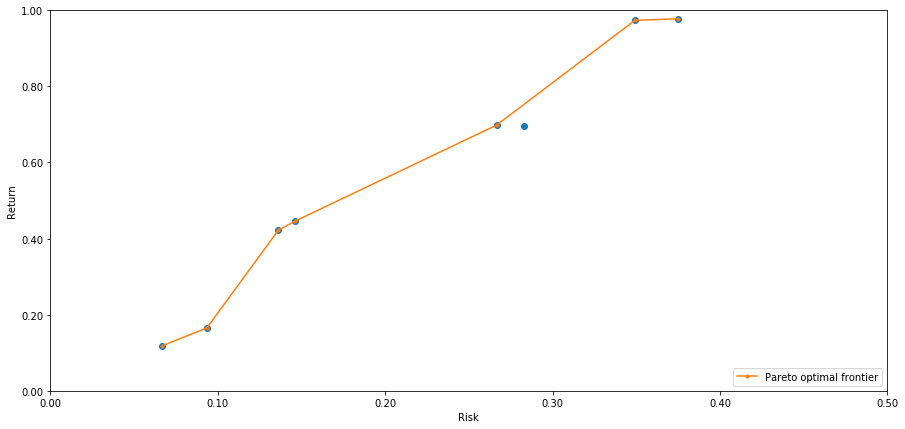

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(table.Risk.values,table.Return.values)
plt.plot(table[table.is_pareto].Risk,table[table.is_pareto].Return, 'C1.-', label='Pareto optimal frontier')
plt.legend( loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.xlim([0,0.5])
plt.ylim([0,1])

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.savefig('rex_spo_pareto.png')

In [28]:
xlim=30
ylim=60
table=table[table.is_pareto]
table=table[table.Risk <= xlim]
table=table[table.Return <= ylim]
del table['is_pareto']
table.style.format({'Return': "{:.2%}", 'Risk': '{:.2%}'})

,$\gamma^\mathrm{risk}$,$\gamma^\mathrm{trade}$,$\gamma^\mathrm{hold}$,Return,Risk
0,50,5,50,97.77%,37.51%
1,50,5,5,97.35%,34.92%
3,250,5,5,69.82%,26.66%
4,50,50,5,44.54%,14.60%
5,50,50,50,42.19%,13.62%
6,250,50,5,16.51%,9.35%
7,250,50,50,11.84%,6.69%
